In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scorecardpy as sc
from sklearn import metrics
import statsmodels.formula.api as smf

# Load data into Python

In [20]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### About this file

#### Pregnancies: Number of times pregnant

#### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

#### BloodPressure: Diastolic blood pressure

#### SkinThickness: Triceps skin fold thickness 

#### Insulin: 2-Hour serum insulin

#### BMI: Body mass index 

#### DiabetesPedigreeFunction: Diabetes pedigree function

#### Age: Age of people

#### Outcome: Class variable (0 or 1)

# Missing Value Analysis and EDA

In [21]:
#Replace zero with np.na
#Since zero has no meaning in these variables
for i in df.index:
    if df.loc[i, 'Glucose'] == 0:
        df.loc[i, 'Glucose'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BloodPressure'] == 0:
        df.loc[i, 'BloodPressure'] = np.nan
        
for i in df.index:
    if df.loc[i, 'SkinThickness'] == 0:
        df.loc[i, 'SkinThickness'] = np.nan
        
for i in df.index:
    if df.loc[i, 'Insulin'] == 0:
        df.loc[i, 'Insulin'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BMI'] == 0:
        df.loc[i, 'BMI'] = np.nan

In [22]:
((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values percentage'}, axis = 1).style.background_gradient('gist_heat_r')

In [23]:
# Because it is hard to know how to make up the values of insulin variable, we do not have enough knowledge of it
#Drop Insulin
df=df.drop('Insulin', axis=1)

#Replace with median for the rest
df.fillna(df.median(), inplace=True)

In [24]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073   32.455208   
std       3.369578   30.438286      12.096642       8.791221    6.875177   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.750000      64.000000      25.000000   27.500000   
50%       3.000000  117.000000      72.000000      29.000000   32.300000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

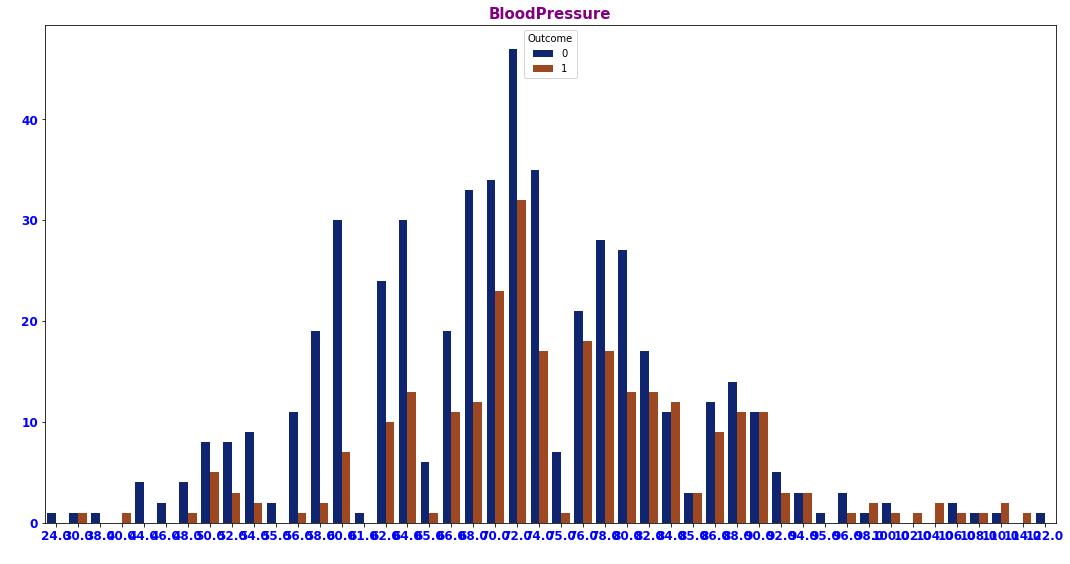

In [25]:
## Count plots of BloodPressure with hue as Outcome
plt.figure(figsize = (15,15))
for i,col in enumerate(['BloodPressure']):
  plt.subplot(2,1,i+1)
  sns.countplot(x = col,  data = df, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = 'purple')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'blue')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'blue')
  plt.tight_layout();

# Research Question

## People test positive in diabetes have higher blood pressure

In [26]:
m1,m2 = df.groupby('Outcome')['BloodPressure'].mean()


s1,s2 = df.groupby('Outcome')['BloodPressure'].std()

si1,si2 = df.groupby('Outcome')['BloodPressure'].size()

In [27]:
# two sample student t test
from scipy import stats
mean1 = m1
mean2 = m2

std1 = s1
std2 = s2

nobs1 = si1
nobs2 = si2

modified_std1 = np.sqrt(np.float32(nobs1)/np.float32(nobs1-1)) * std1
modified_std2 = np.sqrt(np.float32(nobs2)/np.float32(nobs2-1)) * std2

(statistic, pvalue) = stats.ttest_ind_from_stats(mean1=mean1, std1=modified_std1, nobs1=si1, mean2=mean2, std2=modified_std2, nobs2=si2)

print( "t statistic is: ", statistic)
print("The p value is: ", pvalue)

## accept null hypothesis

t statistic is:  -4.644913031860782
The p value is:  4.003630545477364e-06


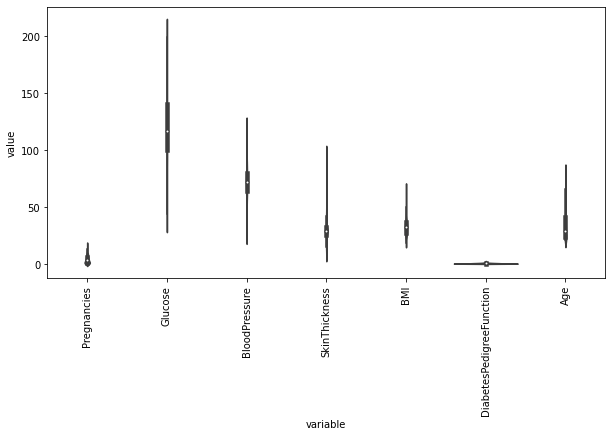

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(df.iloc[:, np.r_[0:7]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

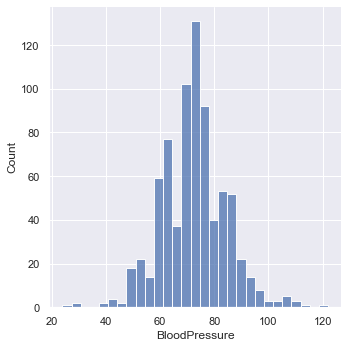

In [30]:
fig = sns.displot(df['BloodPressure'], kind = 'hist')
plt.show()

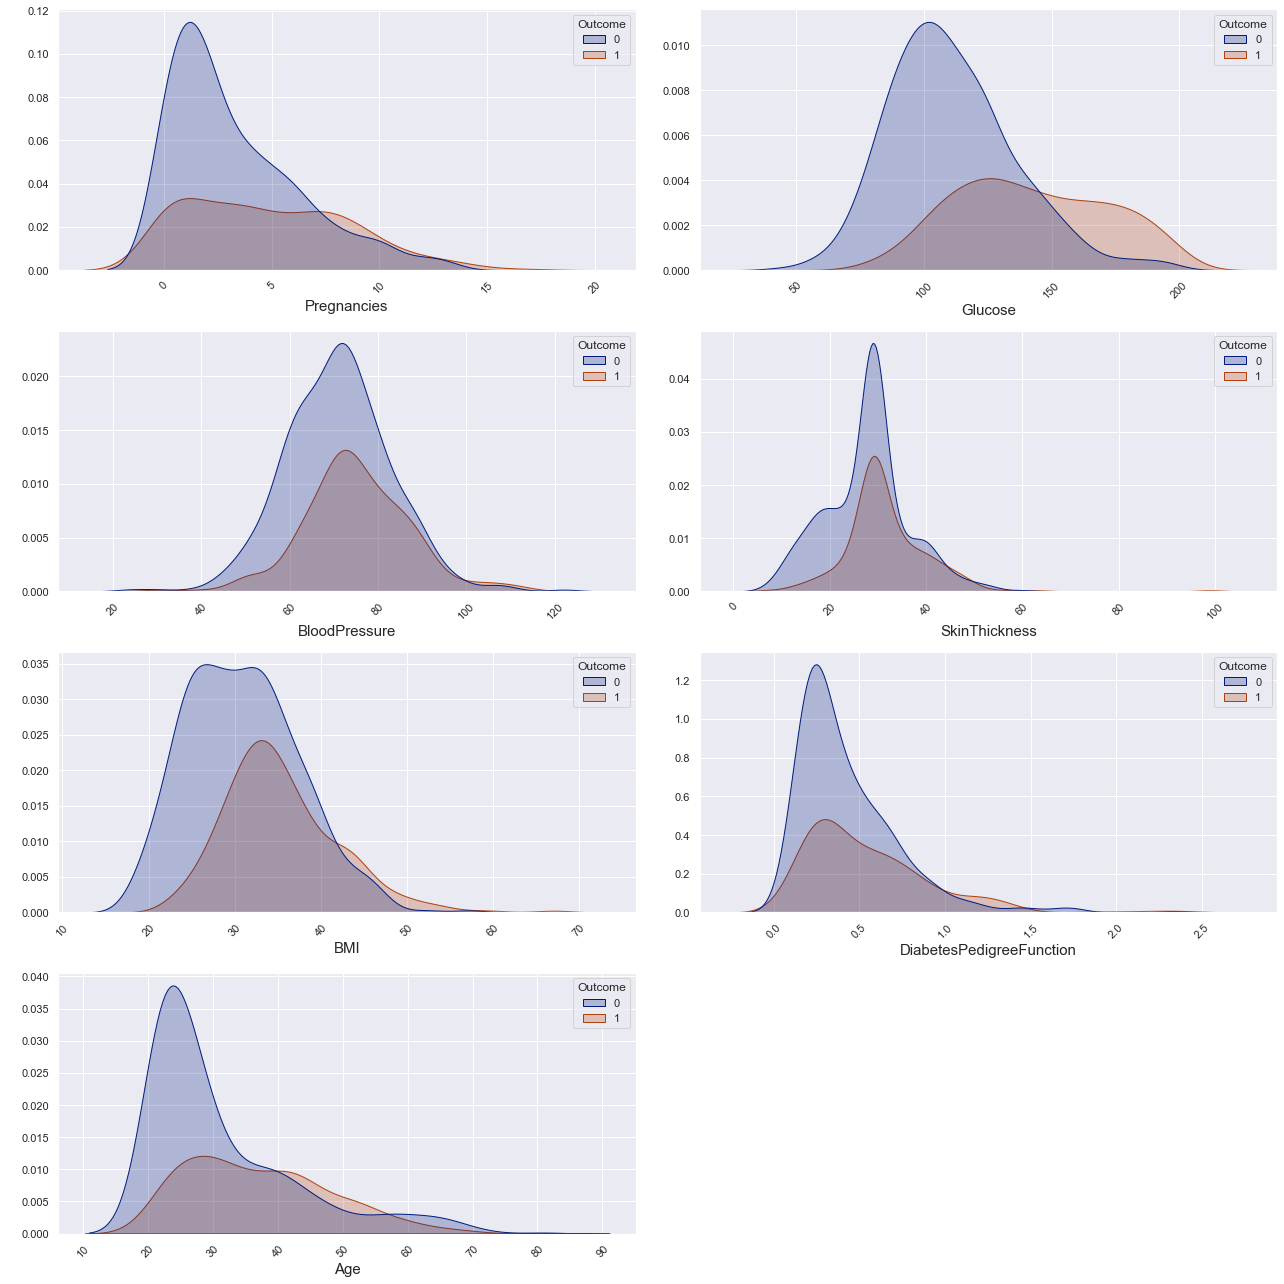

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,18))
for i in enumerate(df.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

<AxesSubplot:>

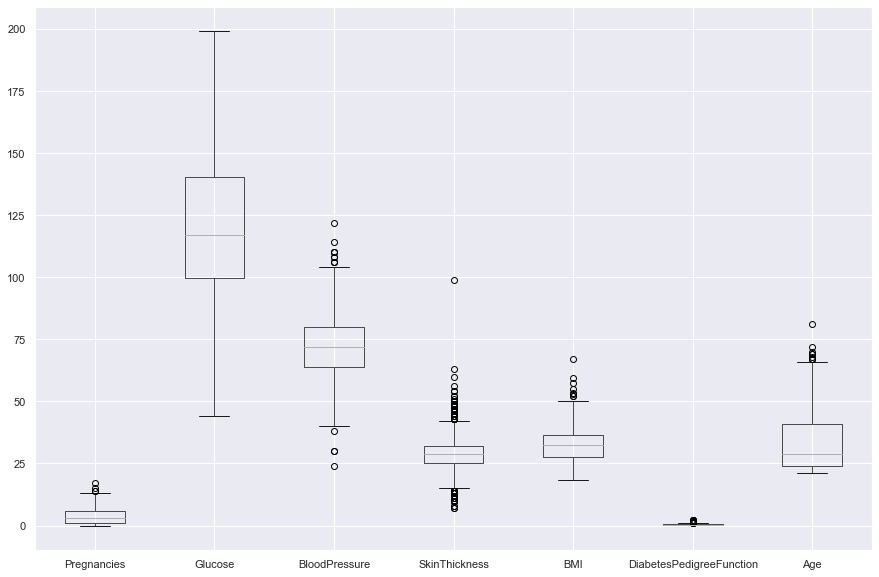

In [31]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age'], figsize=(15,10))

In [18]:

# since we do not want outliers we need to delete the obseravtions that are possibly outliers
df = df.loc[df['Pregnancies'] <= 12]

#Glucose does not have outliers

#Blood pressure have many outliers, but we will keep those outliers since they are just the real life situation and we want to make sure our model learn some of that

df = df.loc[df['SkinThickness'] < 50]
df = df.loc[df['SkinThickness'] >= 10]

#BMI
#From the distribution plot we noticed that there are very extreme outliers on the right side. 
#cut-off: 53
df = df.loc[df['BMI'] <= 50]

#DiabetesPedigreeFunction
#From distribution plot, extreme outliers on the right side. 
# cut-off: 1.2
df = df.loc[df['DiabetesPedigreeFunction'] <= 1.2]

#Age
#Even though the plot is very right skewed, we would do nothing to this variable. 80 years old still makes sense

In [32]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073   32.455208   
std       3.369578   30.438286      12.096642       8.791221    6.875177   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.750000      64.000000      25.000000   27.500000   
50%       3.000000  117.000000      72.000000      29.000000   32.300000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

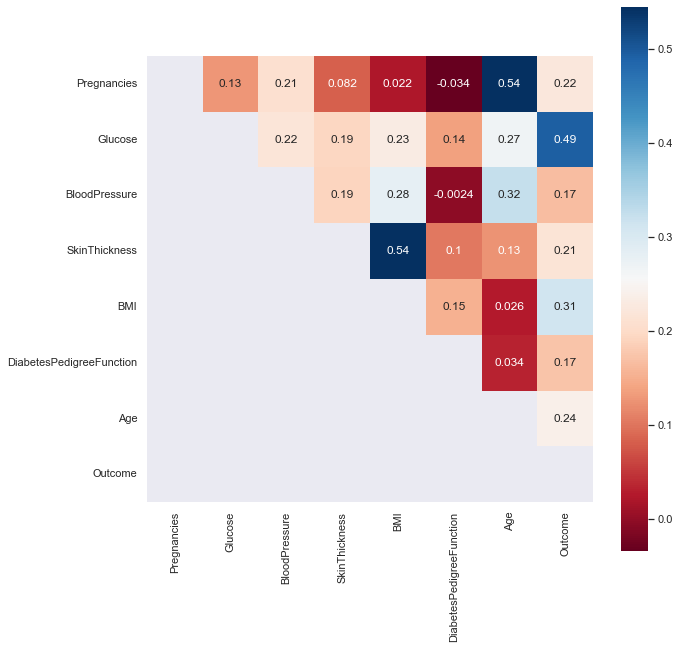

In [33]:
## Correlation Matrix
corr_matrix=df.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True);

# Build  the Model

In [34]:
model1=smf.ols('BloodPressure~Pregnancies+Glucose+BMI+SkinThickness+DiabetesPedigreeFunction+Age+Outcome', data=df)
m1=model1.fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     25.77
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.02e-31
Time:                        01:25:41   Log-Likelihood:                -2922.0
No. Observations:                 768   AIC:                             5860.
Df Residuals:                     760   BIC:                             5897.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [39]:
X = df[['BMI','Age']]
y = df['BloodPressure']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [40]:
mlregression=smf.ols('BloodPressure~BMI+Age',data=df)
new=mlregression.fit()
print(new.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     84.03
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.02e-33
Time:                        01:40:46   Log-Likelihood:                -2927.6
No. Observations:                 768   AIC:                             5861.
Df Residuals:                     765   BIC:                             5875.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9202      2.191     20.959      0.0

In [42]:
y_pred = new.predict(X_test)

In [44]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 11.271701309382125


In [ ]:
y_pred = new.predict(X_test)

In [45]:
df_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

Actual  Predicted
661    76.0  73.729910
122    74.0  69.587878
113    62.0  70.434133
14     72.0  74.996170
529    65.0  67.879141
..      ...        ...
476    80.0  71.598045
482    58.0  68.435822
230    86.0  74.258507
527    74.0  66.406932
380    72.0  68.569376

[154 rows x 2 columns]

# ANOVA

In [46]:
#Anova table
anv=sm.stats.anova_lm(new, typ=2)
anv
## We now find that 

sum_sq     df          F        PR(>F)
BMI        8366.487614    1.0  69.554725  3.447802e-16
Age       11336.736924    1.0  94.247868  4.321126e-21
Residual  92019.096978  765.0        NaN           NaN

#### We find that bloodpressure has no relationship with outcome but with age and bmi